# Black Marble PY

Short intro notebook to showcase how to use the Black Marble dataset.

## Authorization

In order to access the data, we need to authorize to the server with a special token called a "Bearer token". This is conveniently stored as an environment variable in the Conda environment (assuming you have followed the setup instructions from the `README.md`). We get the token here for use later in the code.

This notebook is based on the documentation of the `blackmarblepy` package. You can look through it here: <https://worldbank.github.io/blackmarblepy/notebooks/blackmarblepy.html>

In [2]:
import os
from pathlib import Path

# Directory to download files to (ignore in git)
DATA_DIR = Path('../data')

# Get Bearer token from environment
BEARER_TOKEN = os.getenv("BLACKMARBLE_TOKEN") or ""
assert (
    BEARER_TOKEN != ""
), "BLACKMARBLE_TOKEN not defined! Please set this environment variable or use the provided Conda environment."

## Area of Interest

Next, we need to define a geographic area of interest. You can get the necessary file from [GADM](https://gadm.org/download_country.html). There, choose the area of interest, and then look for `GeoJSON: level1`, right-click the link and select "Copy Link URL" (or similar). Then paste it in the cell below.

In [3]:
# We download the file locally to avoid having to download it every time
GDF_URL = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_MMR_1.json.zip"
GDF_DOWNLOAD_PATH = DATA_DIR / 'gdf.json.zip'

if not GDF_DOWNLOAD_PATH.exists():
    os.system(f"wget -O {GDF_DOWNLOAD_PATH} {GDF_URL}")
    print("Data downloaded")
else:
    print("Already downloaded, skipping...")

Already downloaded, skipping...


In [4]:
import geopandas

gdf = geopandas.read_file(GDF_DOWNLOAD_PATH)
gdf.explore(tiles="CartoDB dark_matter")

In [5]:
from datetime import date
from blackmarble.raster import bm_raster
from blackmarble.types import Product

# Create output directory
BLACKMARBLE_OUTPUT_DIR = DATA_DIR / "blackmarble"
BLACKMARBLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Daily data: raster for February 5, 2021
VNP46A2_20210205 = bm_raster(
    gdf,
    product_id=Product.VNP46A2,
    date_range=date.fromisoformat("2021-02-05"),
    bearer=BEARER_TOKEN,
    output_directory=BLACKMARBLE_OUTPUT_DIR
)
VNP46A2_20210205

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 81MB
Dimensions:                            (x: 2161, y: 4675, time: 1)
Coordinates:
  * x                                  (x) float64 17kB 92.17 92.18 ... 101.2
  * y                                  (y) float64 37kB 28.54 28.54 ... 9.065
  * time                               (time) datetime64[ns] 8B 2021-02-05
Data variables:
    Gap_Filled_DNB_BRDF-Corrected_NTL  (time, y, x) float64 81MB nan nan ... nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 110.0
    EndTime:                           b'2021-02-05 23:59:59.000'
    GranuleDayNightFlag:               b'Day'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'06'
    WestBoundingCoord:                 100.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

In [9]:
!pip install colorcet contextily geopandas matplotlib seaborn pandas folium mapclassify

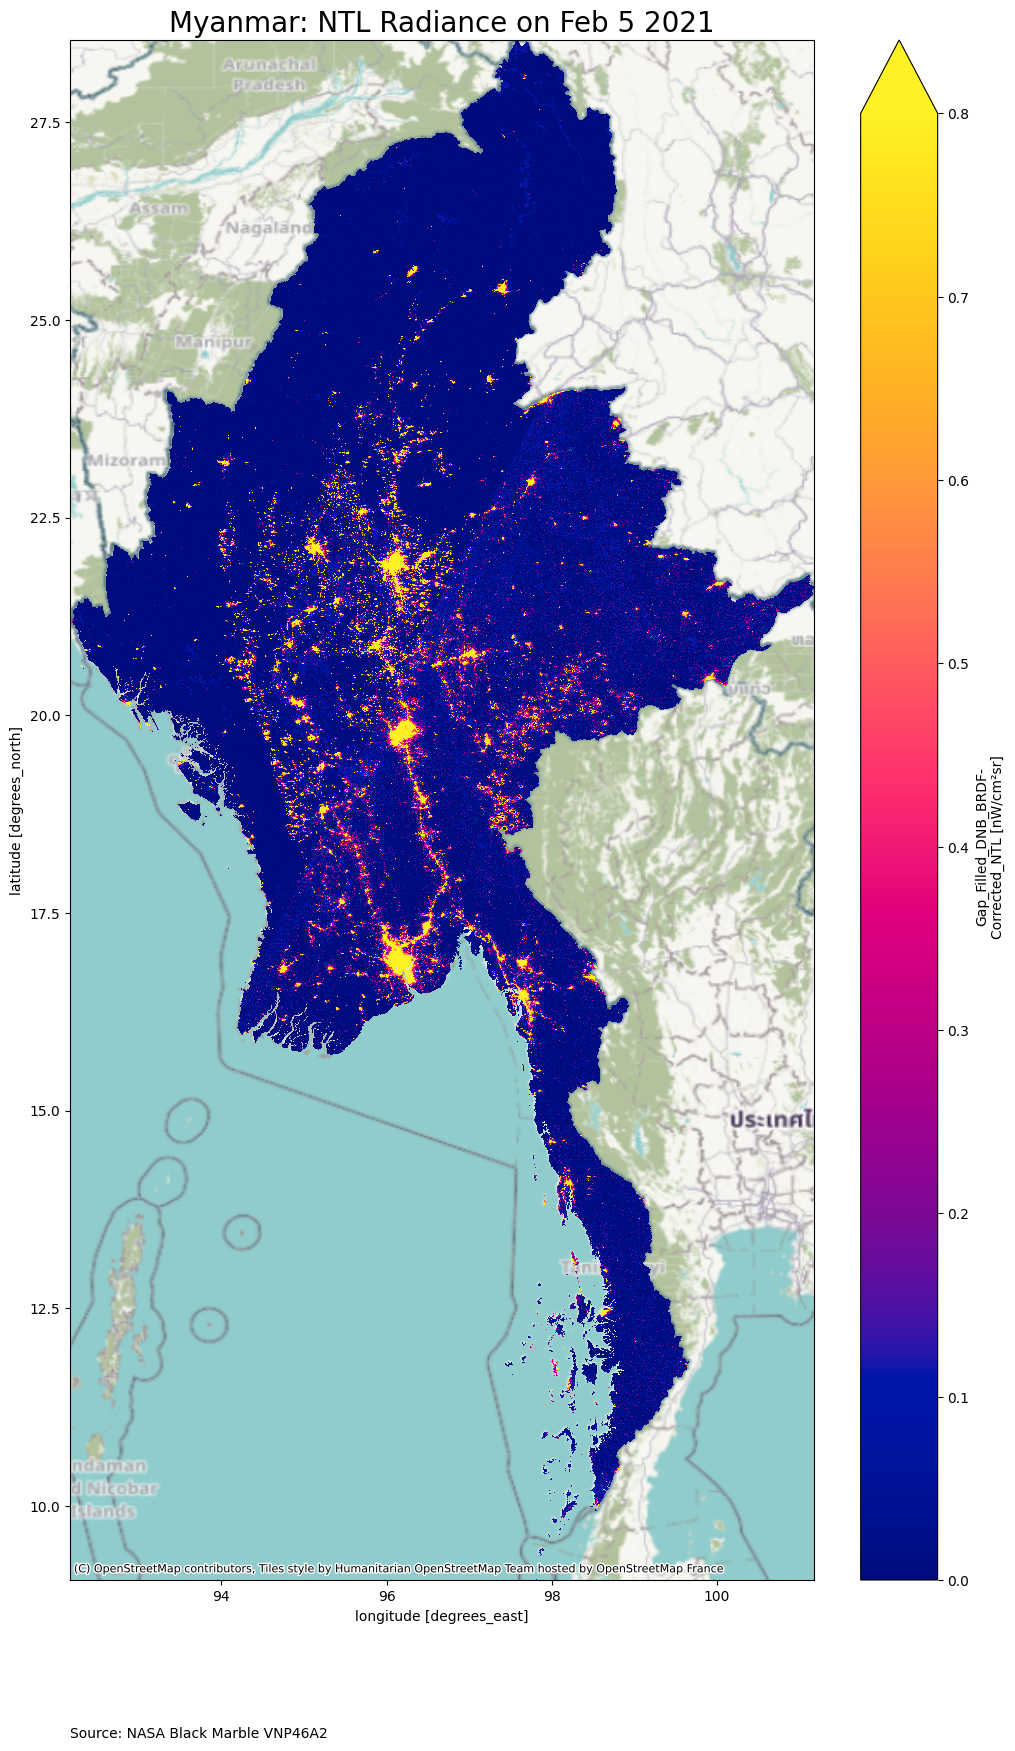

In [12]:
import matplotlib.pyplot as plt
import colorcet as cc
import contextily as cx

fig, ax = plt.subplots(figsize=(12, 20))

VNP46A2_20210205["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(
    time="2021-02-05"
).plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Myanmar: NTL Radiance on Feb 5 2021", fontsize=20);

In [13]:
VNP46A2_20210205["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(
    time="2021-02-05"
)

<xarray.DataArray 'Gap_Filled_DNB_BRDF-Corrected_NTL' (y: 4675, x: 2161)> Size: 81MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(4675, 2161))
Coordinates:
  * x        (x) float64 17kB 92.17 92.18 92.18 92.19 ... 101.2 101.2 101.2
  * y        (y) float64 37kB 28.54 28.54 28.53 28.53 ... 9.073 9.069 9.065
    time     datetime64[ns] 8B 2021-02-05
Attributes:
    units:    nW/cm²sr